In [82]:
import xarray as xr
import pandas as pd
import numpy as np
import scipy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
import openpyxl
from netCDF4 import Dataset
import h5netcdf

In [83]:
sourceData='/bettik/amoryc/MARout/GRa/spin2/work/'
variable='TT' ##RF;SF;SHSN3;TT
fileNameM='mon-TT-MARv3.14_ER5-2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData+fileNameM)['TT']

In [84]:
## Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM)

In [85]:
#Gra Mera 5km
sourceData='/bettik/amoryc/MARout/GRa/spin2/work/'
variable='TT' ##RF;SF;SHSN3;TT
fileNameM='mon-TT-MARv3.14_ER5-2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData+fileNameM)['TT'][:,0,:,:] ## montlhy mean

In [86]:
###
#AWS-Mera La: Since November 2013 (AWS inserted on firm rocks – off-glacier)
#Location in WGS84, Lat: 27.735°N; Long: 86.900°E; Elevation: 5352.008 m 
#or UTM Zone 45; Easting: 490137.007 m; Northing: 3067850.613 m on 22/11/2020
###
lon_MeraLa=86.900
lat_MeraLa=27.735
elev_MeraLa=5352.008
##Find the pixel of MAR corresponding to station
target_lon = lon_MeraLa
target_lat = lat_MeraLa
lon=ds_grM.LON
lat=ds_grM.LAT

In [87]:
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
print(dist)
j, i = np.unravel_index(dist.argmin(), dist.shape)

<xarray.DataArray (y: 116, x: 164)> Size: 76kB
array([[5.287968 , 5.240772 , 5.1936255, ..., 3.5945985, 3.6382864,
        3.6821296],
       [5.274055 , 5.2267156, 5.179424 , ..., 3.5731022, 3.6170528,
        3.6611905],
       [5.2604895, 5.2129927, 5.165556 , ..., 3.5520382, 3.5962706,
        3.640674 ],
       ...,
       [6.0885305, 6.0451493, 6.001897 , ..., 4.597399 , 4.633663 ,
        4.670207 ],
       [6.1141167, 6.0708904, 6.0278106, ..., 4.6302786, 4.666314 ,
        4.702625 ],
       [6.1399245, 6.0968695, 6.0539374, ..., 4.6633754, 4.6991653,
        4.735257 ]], shape=(116, 164), dtype=float32)
Coordinates:
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0


In [88]:
print(j,i)

40 99


In [105]:
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_sta=dsM[0:, i, j]
dsM_sta_new= dsM_sta.rename({'TIME': 'time'})
#units=dsM.units
dsM_sta_new.values

array([-1.90824852e+01, -2.24186306e+01, -1.82904568e+01, -1.28713760e+01,
       -5.10798502e+00, -1.00837791e+00,  1.33607721e+00,  1.06372952e+00,
       -2.41537070e+00, -6.99524021e+00, -1.29380646e+01,  9.96920997e+36,
       -1.93502979e+01, -1.75653591e+01, -1.50343189e+01, -1.06650791e+01,
       -3.61293769e+00, -3.81773189e-02,  1.67794609e+00,  7.43174136e-01,
       -2.22557354e+00, -7.29414368e+00, -1.22269917e+01, -1.66611404e+01,
       -1.94510555e+01, -1.91987057e+01, -1.67628937e+01, -1.19041061e+01,
       -7.96017933e+00, -1.28737497e+00,  1.68266010e+00,  4.28326756e-01,
       -2.82699823e+00, -8.61707687e+00, -1.38247519e+01, -1.69322853e+01,
       -1.73999386e+01, -2.04707737e+01, -1.72716255e+01, -1.20812893e+01,
       -1.06294489e+01, -1.84573436e+00,  6.76232815e-01,  4.59666044e-01,
       -1.56933737e+00, -7.77334261e+00, -1.27443838e+01, -1.70986900e+01,
       -1.93717995e+01, -1.90835590e+01, -1.27565126e+01, -8.05266953e+00,
       -4.26083136e+00, -

In [90]:
#Evaluer la différence de hauteur entre la station et le niveau 1 de la grille MAR considérée
SH_sta=elev_MeraLa
value = ds_grM['SH'].isel(y=j, x=i)
diff=SH_sta-value.values
diff

np.float32(16.686035)

In [91]:
####
## Opening station data
####

In [92]:
sourceData='/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/'
fileName='MeraLafinal2013_24.xlsx'
xl_file = pd.ExcelFile(sourceData+fileName)
print(xl_file)

In [93]:
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
DataMeraLa=dfs['MeraLa2013_23']

NameVars=['Time','Tair','RH','u','Direction','SWin','SWout','LWin','LWout','Patm']
UnitVars=['data/hour','C','%','m/s','degrees','W/m2','W/m2','W/m2','W/m2','hPa']

##Define new DataFrame and changing name of columns
dfile = pd.DataFrame(data=DataMeraLa.loc[4:])
df=pd.DataFrame(dfile.values, columns=NameVars)

### Opening one column + converting into an array
Tair_ar=[float(i) for i in df.Tair.values]


In [94]:
##In original time data from DataFrame, frequency is not defined so I cannot use the usual fonction (xr,pd)
##Need to redefine a time array + build a xarray of variable V=V(time)
def NewTime(
        NameVar,
        Var_ar,
        freq):
    start, end = df.Time.values[0], df.Time.values[-1]
    time = pd.date_range(start, end, freq=freq)
    ds = xr.Dataset({NameVar: ("time",np.asarray(Var_ar)), "time": time})
    return ds 

In [95]:
#Définition Variables
T=NewTime('Tair',Tair_ar,'30min')


In [96]:
daily_meanT=T.resample(time='D').mean()                          #Utilisation de la librairie xarray maintenant possible car les données ont une forme bien définie
monthly_meanT=daily_meanT.resample(time='ME').mean()             # chaque variable ici défini est un xarray.Dataset
yearly_meanT=monthly_meanT.resample(time='YE').mean()
#daily_meanTM

In [97]:
#Définition des Saisons, et création d'une fonction qui définit les saisons en fonction des périodes des moussons:
seasons = {
	'MAM': [3, 4, 5],  	
	'JJAS': [6, 7, 8, 9],  
	'ON': [10, 11],    	
	'DJF': [12, 1, 2]  	
}
def seasonsdata(ds, season_name):  #monthly_meanTM.sel(time=monthly_meanTM['time'].dt.month.isin(seasons['MAM'])). Sélectionne dans le dataset les mois correspondants aux saisons définies au dessus

	x = seasons[season_name]
	return ds.sel(time=ds['time'].dt.month.isin(x))


In [98]:
# Get the time coordinates CORRIGER DIFF ENTRE MAR ET STATION
time1 = monthly_meanT['time']# début 2013-11-15 fin 2024-11-28
time2 = dsM_sta_new['time'] # début 2003-01-01T12: fin 2013-12-31T12
start=time1[0] 
end=time2[-1]

In [99]:
ts_sta=monthly_meanT.sel(time=slice(start,end))
ts_MAR=dsM_sta_new.sel(time=slice(start,end))

#Annual cycle:
Tsta_cycle=ts_sta.groupby('time.dayofyear').mean()

TMAR_daily_cycle=ts_MAR.groupby('time.dayofyear').mean()
plt.plot(Tsta_daily_cycle.dayofyear,Tsta_daily_cycle.Tair,     
    color='darkblue',linestyle='-',label='Tair')
plt.title('Mean annual cycle of daily surface Temperatures')
plt.xlabel('Day of year')
plt.ylabel('Température (°C)')
#Annual cycle:
plt.plot(TMAR_daily_cycle.dayofyear,TMAR_daily_cycle.values,    
    color='red',linestyle='-',label='Tair MAR')
plt.legend()
plt.grid(True)




In [100]:
dsM_sta_new#[#0,:,:].plot()

<xarray.DataArray 'TT' (time: 278)> Size: 1kB
array([-1.293806e+01,  9.969210e+36, -1.935030e+01, ..., -7.527834e+00,
       -1.234665e+01, -1.516664e+01], shape=(278,), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-11-16 ... 2023-12-16T12:00:00
    X        float32 4B -295.0
    Y        float32 4B 300.0
    ATMLAY   float32 4B 0.9995
Attributes:
    long_name:     Temperature
    units:         C
    cell_methods:  TIME: mean
    history:       From ICE.a98.2000.01.01-31

In [101]:
dsM

<xarray.DataArray 'TT' (TIME: 288, Y: 116, X: 164)> Size: 22MB
[5478912 values with dtype=float32]
Coordinates:
  * TIME     (TIME) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2023-12-16T12:...
  * X        (X) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * Y        (Y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0
    ATMLAY   float32 4B 0.9995
Attributes:
    long_name:     Temperature
    units:         C
    cell_methods:  TIME: mean
    history:       From ICE.a98.2000.01.01-31

In [102]:
Tsta_monthly_cycle=monthly_meanT.groupby('time.month').mean()
TMAR_monthly_cycle=dsM_sta_new.groupby('time.month').mean()
TMAR_monthly_cycle

<xarray.DataArray 'TT' (month: 12)> Size: 48B
array([-1.9284153e+01, -1.8508404e+01, -1.5455123e+01, -1.1436944e+01,
        4.3344393e+35, -1.2150373e+00,  4.3344393e+35,  9.7391492e-01,
       -1.1929659e+00, -8.1622915e+00, -1.3124288e+01,  4.1538375e+35],
      dtype=float32)
Coordinates:
    X        float32 4B -295.0
    Y        float32 4B 300.0
    ATMLAY   float32 4B 0.9995
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Temperature
    units:         C
    cell_methods:  TIME: mean
    history:       From ICE.a98.2000.01.01-31

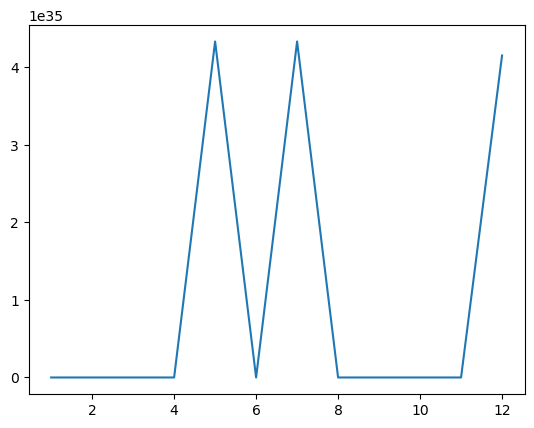

In [103]:
plt.plot(TMAR_monthly_cycle.month,TMAR_monthly_cycle.values)

AttributeError: 'DataArray' object has no attribute 'time'

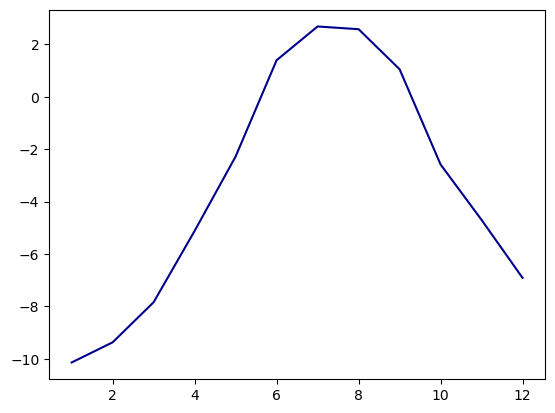

In [104]:
#Monthly cycle

plt.plot(Tsta_monthly_cycle.month,Tsta_monthly_cycle.Tair,
    color='darkblue',linestyle='-',label='Tair')

plt.plot(TMAR_monthly_cycle.time,TMAR_monthly_cycle.values,
    color='red',linestyle='-',label='Tair MAR')
plt.title('Mean annual cycle of daily surface Temperatures')
plt.xlabel('Month of year')
plt.ylabel('Température (°C)')

plt.grid(True)

In [ ]:
#MAR BIAS over Monthly mean data:
plt.plot(TMAR_monthly_cycle.month, Tsta_monthly_cycle.Tair-TMAR_monthly_cycle.values,
         color='darkblue',linestyle=':',label='Tair;'+'MAR')
plt.xlabel('Month of year')
plt.ylabel('Température (°C)')


In [ ]:
#MAR BIAS over Daily mean data:
plt.plot(TMAR_daily_cycle.dayofyear, Tsta_daily_cycle.Tair-TMAR_daily_cycle.values,
         color='darkblue',linestyle=':',label='Tair;'+'MAR')
plt.xlabel('Month of year')
plt.ylabel('Température (°C)')



In [ ]:
Tsta_premon = seasonsdata(daily_meanT, 'MAM').groupby('time.dayofyear').mean()

Tsta_mon = seasonsdata(daily_meanT, 'JJAS').groupby('time.dayofyear').mean()

Tsta_postmon =  seasonsdata(daily_meanT, 'ON').groupby('time.dayofyear').mean()

Tsta_hiver  = seasonsdata(daily_meanT, 'DJF').groupby('time.dayofyear').mean()


In [ ]:
dsM_sta_new


TMAR_premon = seasonsdata(dsM_sta_new, 'MAM').groupby('time.dayofyear').mean()

TMAR_mon = seasonsdata(dsM_sta_new, 'JJAS').groupby('time.dayofyear').mean()

TMAR_postmon =  seasonsdata(dsM_sta_new, 'ON').groupby('time.dayofyear').mean()

TMAR_hiver  = seasonsdata(dsM_sta_new, 'DJF').groupby('time.dayofyear').mean()





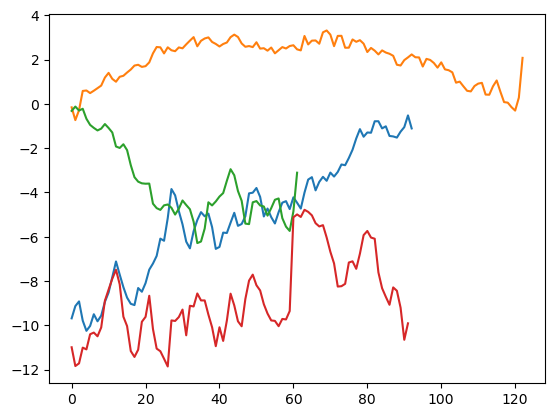

In [146]:
plt.plot(Tsta_premon.Tair)
plt.plot(Tsta_mon.Tair)
plt.plot(Tsta_postmon.Tair)
plt.plot(Tsta_hiver.Tair)

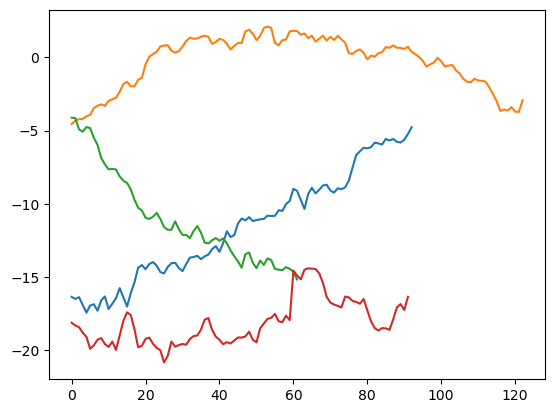

In [149]:
plt.plot(TMAR_premon.values)
plt.plot(TMAR_mon.values)
plt.plot(TMAR_postmon.values)
plt.plot(TMAR_hiver.values)



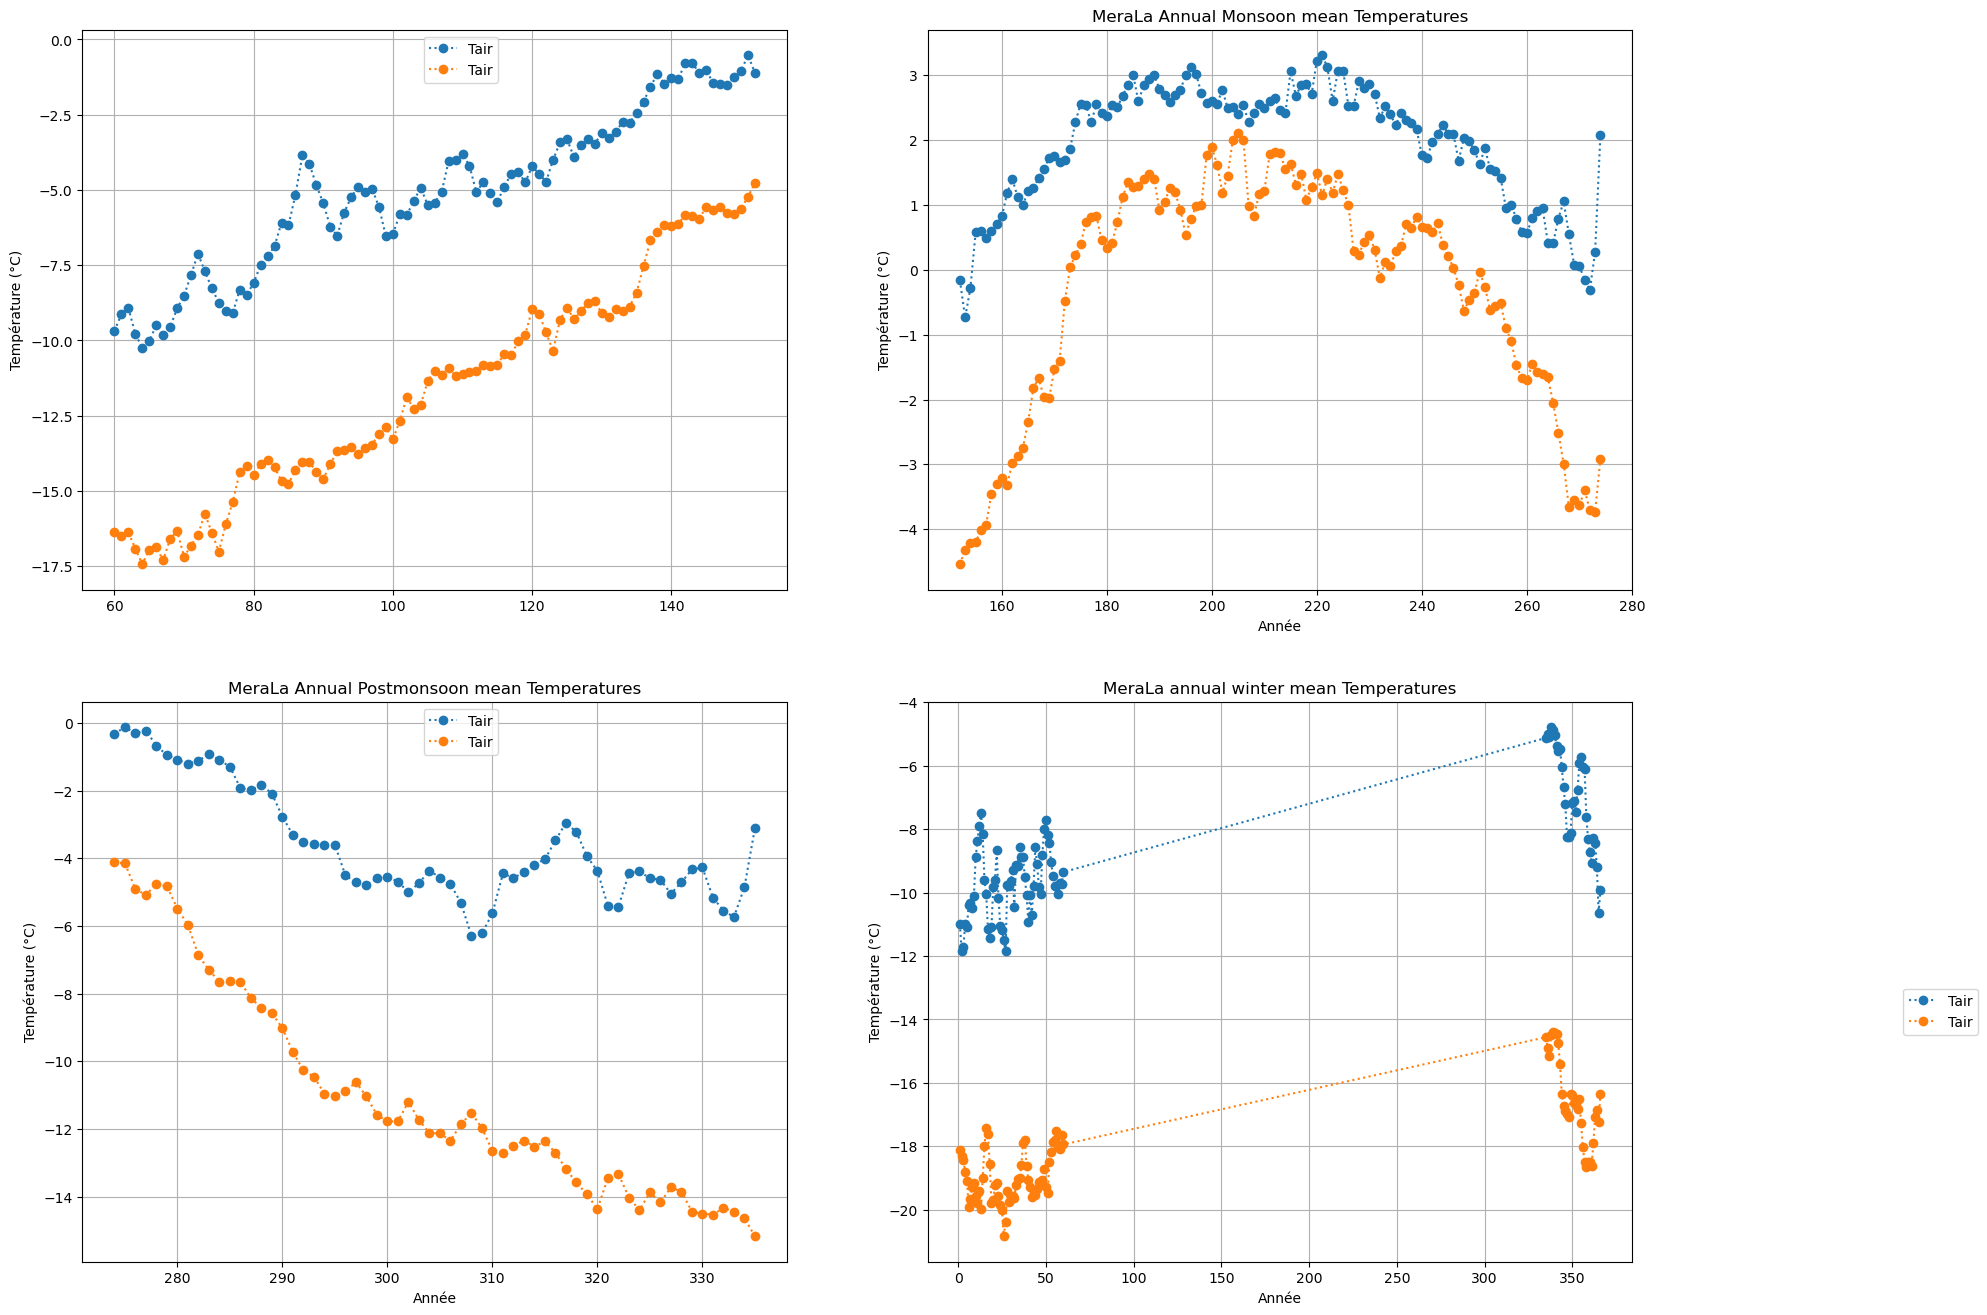

In [153]:
fig, ((ax1,ax2) , (ax3,ax4)) = plt.subplots(2,2, figsize=(20,16))
ax1.plot(Tsta_premon.dayofyear, Tsta_premon['Tair'].values, linestyle=':', marker= 'o', label='Tair')
ax1.plot(TMAR_premon.dayofyear, TMAR_premon.values, linestyle=':', marker= 'o', label='Tair')
ax1.legend(bbox_to_anchor=(0.1, 0.5, 0.5, 0.5)) 
ax1.set_title('')
ax1.set_xlabel('')
ax1.set_ylabel('Température (°C)')
ax1.grid()

ax2.plot(Tsta_mon.dayofyear, Tsta_mon['Tair'].values, linestyle=':', marker= 'o', label='Tair')
ax2.plot(TMAR_mon.dayofyear, TMAR_mon.values, linestyle=':', marker= 'o', label='Tair')
ax2.set_title('MeraLa Annual Monsoon mean Temperatures')
ax2.set_xlabel('Année')
ax2.set_ylabel('Température (°C)')
ax2.grid()

ax3.plot(Tsta_postmon.dayofyear, Tsta_postmon['Tair'].values, linestyle=':', marker= 'o', label='Tair')
ax3.plot(TMAR_postmon.dayofyear, TMAR_postmon.values, linestyle=':', marker= 'o', label='Tair')
ax3.legend(bbox_to_anchor=(0.1, 0.5, 0.5, 0.5)) 
ax3.set_title('MeraLa Annual Postmonsoon mean Temperatures')
ax3.set_xlabel('Année')
ax3.set_ylabel('Température (°C)')
ax3.grid()

ax4.plot(Tsta_hiver.dayofyear, Tsta_hiver['Tair'].values, linestyle=':', marker= 'o', label='Tair')
ax4.plot(TMAR_hiver.dayofyear, TMAR_hiver.values, linestyle=':', marker= 'o', label='Tair')
ax4.legend(bbox_to_anchor=(1, 0, 0.5, 0.5)) 
ax4.set_title('MeraLa annual winter mean Temperatures')
ax4.set_xlabel('Année')
ax4.set_ylabel('Température (°C)')
ax4.grid()